In [1]:
import pandas as pd
import numpy as np
import os
#import warnings
#warnings.filterwarnings('ignore')
from datetime import date
from datetime import datetime
import dateutil
from pandas import *
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [2]:
weather = pd.ExcelFile('C:\\Users\\HP\Desktop\\PHD Hackathon\\Data Science\\PhD_Train_Data\\WeatherDataNew.xlsx')
weather9 = pd.read_excel(weather, sheetname='2009')
weather10 = pd.read_excel(weather, sheetname='2010', na_values=[' ', '-'])
weather11 = pd.read_excel(weather, sheetname='2011', na_values=[' ', '-'])
weather12 = pd.read_excel(weather, sheetname='2012', na_values=[' ', '-'])
weather13 = pd.read_excel(weather, sheetname='2013', na_values=[' ', '-'])
weather14 = pd.read_excel(weather, sheetname='2014', na_values=[' ', '-'])
weather15 = pd.read_excel(weather, sheetname='2015', na_values=[' ', '-'])
weather16 = pd.read_excel(weather, sheetname='2016', na_values=[' ', '-'])

In [3]:
df_list = [weather9, weather10, weather11, weather12, weather13, weather14, weather15, weather16]

weatherData = pd.concat(df_list)
print(weatherData.shape)
weatherData.tail()


(2922, 23)


,Year,Month,Day,Temp high (°C),Temp avg (°C),Temp low (°C),Dew Point high (°C),Dew Point avg (°C),Dew Point low (°C),Humidity (%) high,...,Sea Level Press. (hPa) avg,Sea Level Press. (hPa) low,Visibility (km) high,Visibility (km) avg,Visibility (km) low,Wind (km/h) low,Wind (km/h) avg,Wind (km/h) high,Precip. (mm) sum,WeatherEvent
361,2016,Dec,27,16.0,10.0,4.0,11.0,6.0,-3.0,89.0,...,1012.0,1008.0,16.0,16.0,14.0,32,12,53,0,NaN
362,2016,Dec,28,4.0,3.0,1.0,-3.0,-6.0,-7.0,64.0,...,1019.0,1014.0,16.0,16.0,16.0,23,8,34,0,NaN
363,2016,Dec,29,8.0,4.0,1.0,7.0,2.0,-7.0,96.0,...,1006.0,1000.0,16.0,10.0,2.0,24,9,40,9.91,Rain
364,2016,Dec,30,4.0,3.0,1.0,-1.0,-4.0,-7.0,82.0,...,1006.0,1000.0,16.0,14.0,1.0,29,15,47,0.25,"Fog , Snow"
365,2016,Dec,31,7.0,3.0,-1.0,-3.0,-7.0,-9.0,56.0,...,1016.0,1012.0,16.0,16.0,16.0,24,11,40,0,NaN


In [4]:
weatherData.columns = ['Year', 'Month', 'Day', 'Temp high (°C)', 'Temp avg (°C)', 'Temp low (°C)',
                        'Dew Point high (°C)', 'Dew Point avg (°C)', 'Dew Point low (°C)',
                       'Humidity_high', 'Humidity_avg', 'Humidity_low','Sea Level Press high', 'Sea Level Press avg',
                       'Sea Level Press low', 'Visibility (km) high','Visibility (km) avg', 'Visibility (km) low', 'Wind (km/h) low',
                       'Wind (km/h) avg', 'Wind (km/h) high', 'Precip (mm) sum','WeatherEvent']

In [5]:
vals_to_replace = {'Jan':'1','Feb':'2','Mar':'3','Apr':'4','May':'5','Jun':'6','Jul':'7','Aug':'8','Sep':'9','Oct':'10','Nov':'11','Dec':'12'}
weatherData['Month'] = weatherData['Month'].apply(lambda x: vals_to_replace[x])

In [6]:
print("Nulls In (Precip (mm) sum) :", weatherData['Precip (mm) sum'].isnull().sum())
weatherData['Precip (mm) sum'] =   weatherData['Precip (mm) sum'].apply(lambda x: 0.01 if x == 'T' else x)  
weatherData['Precip (mm) sum'].isnull().sum()

Nulls In (Precip (mm) sum) : 1


1

In [7]:
weatherData.iloc[:, 2:-1] = weatherData.iloc[:, 2:-1].apply(pd.to_numeric, errors = 'coerce')
weatherData.dtypes

Year                      int64
Month                    object
Day                       int64
Temp high (°C)          float64
Temp avg (°C)           float64
Temp low (°C)           float64
Dew Point high (°C)     float64
Dew Point avg (°C)      float64
Dew Point low (°C)      float64
Humidity_high           float64
Humidity_avg            float64
Humidity_low            float64
Sea Level Press high    float64
Sea Level Press avg     float64
Sea Level Press low     float64
Visibility (km) high    float64
Visibility (km) avg     float64
Visibility (km) low     float64
Wind (km/h) low         float64
Wind (km/h) avg         float64
Wind (km/h) high        float64
Precip (mm) sum         float64
WeatherEvent             object
dtype: object

In [8]:
weatherData.iloc[:, 2:-1] = weatherData.iloc[:, 2:-1].apply(lambda x: x.fillna(x.mean()))
weatherData.loc[:, 'WeatherEvent'] = weatherData.loc[:, 'WeatherEvent'].fillna('Other')

In [9]:
weatherData_final = weatherData.copy()
weatherData_final.isnull().any()

Year                    False
Month                   False
Day                     False
Temp high (°C)          False
Temp avg (°C)           False
Temp low (°C)           False
Dew Point high (°C)     False
Dew Point avg (°C)      False
Dew Point low (°C)      False
Humidity_high           False
Humidity_avg            False
Humidity_low            False
Sea Level Press high    False
Sea Level Press avg     False
Sea Level Press low     False
Visibility (km) high    False
Visibility (km) avg     False
Visibility (km) low     False
Wind (km/h) low         False
Wind (km/h) avg         False
Wind (km/h) high        False
Precip (mm) sum         False
WeatherEvent            False
dtype: bool

In [10]:
col_list = ['Year', 'Month', 'Temp high (°C)', 'Temp avg (°C)', 'Temp low (°C)','Dew Point high (°C)', 'Dew Point avg (°C)', 
            'Dew Point low (°C)','Humidity_high', 'Humidity_avg', 'Humidity_low', 'Sea Level Press high','Sea Level Press avg',
            'Sea Level Press low', 'Visibility (km) high','Visibility (km) avg', 'Visibility (km) low', 'Wind (km/h) low',
            'Wind (km/h) avg', 'Wind (km/h) high', 'Precip (mm) sum','WeatherEvent']

In [11]:
features = {col_list[2]:['min','max','mean','var'],col_list[3]:['min','max','mean','var'],col_list[4]:['min','max','mean','var'],
           col_list[5]:['min','max','mean','var'], col_list[6]:['min','max','mean','var'], col_list[7]:['min','max','mean','var'],
           col_list[8]:['min','max','mean','var'], col_list[9]:['min','max','mean','var'], col_list[10]:['min','max','mean','var'],
col_list[11]:['min','max','mean','var'], col_list[12]:['min','max','mean','var'], col_list[13]:['min','max','mean','var'],
col_list[14]:['min','max','mean','var'], col_list[15]:['min','max','mean','var'], col_list[16]:['min','max','mean','var'],
col_list[17]:['min','max','mean','var'], col_list[18]:['min','max','mean','var'], col_list[19]:['min','max','mean','var']}

weather_features = weatherData_final.groupby(['Year','Month']).agg(features).reset_index()

In [12]:
weather_features.columns = [x[0]+x[1] for x in weather_features.columns]
weather_features.head()

,Year,Month,Temp high (°C)min,Temp high (°C)max,Temp high (°C)mean,Temp high (°C)var,Temp avg (°C)min,Temp avg (°C)max,Temp avg (°C)mean,Temp avg (°C)var,...,Wind (km/h) lowmean,Wind (km/h) lowvar,Wind (km/h) avgmin,Wind (km/h) avgmax,Wind (km/h) avgmean,Wind (km/h) avgvar,Wind (km/h) highmin,Wind (km/h) highmax,Wind (km/h) highmean,Wind (km/h) highvar
0,2009,1,-9.0,8.0,0.741935,16.664516,-11.0,5.0,-2.096774,13.956989,...,27.000000,35.066667,4.0,18.0,12.000000,12.200000,21.0,60.0,39.322581,96.625806
1,2009,10,7.0,23.0,16.258065,20.064516,6.0,19.0,12.870968,14.582796,...,23.516129,42.724731,2.0,19.0,9.677419,16.025806,14.0,71.0,34.419355,110.918280
2,2009,11,10.0,21.0,13.733333,8.202299,7.0,16.0,10.800000,5.889655,...,25.866667,41.429885,4.0,25.0,11.133333,25.636782,21.0,63.0,36.733333,108.685057
3,2009,12,-2.0,19.0,5.451613,29.055914,-5.0,15.0,2.354839,24.303226,...,28.580645,36.651613,6.0,23.0,13.451613,19.189247,24.0,64.0,42.838710,97.473118
4,2009,2,-6.0,18.0,6.964286,30.850529,-9.0,13.0,2.785714,24.322751,...,27.928571,47.253968,6.0,22.0,12.214286,21.656085,24.0,77.0,41.642857,167.349206


In [13]:
weatherData['dummy'] = 1

weatherEvent_pivot = pivot_table(data = weatherData, columns=['WeatherEvent'], index = ['Year', 'Month'], 
                                 values='dummy', aggfunc='sum', fill_value=0) 
                                
weatherEvent_pivot.columns = [i for i in weatherEvent_pivot.columns]
weatherEvent_pivot = weatherEvent_pivot.reset_index()
weatherEvent_pivot.tail()


,Year,Month,Fog,"Fog , Rain","Fog , Rain , Snow","Fog , Snow",Other,Rain,"Rain , Snow",Snow,Thunderstorm
91,2016,5,0,1,0,0,20,10,0,0,0
92,2016,6,0,1,0,0,21,8,0,0,0
93,2016,7,0,5,0,0,18,8,0,0,0
94,2016,8,0,2,0,0,21,8,0,0,0
95,2016,9,0,2,0,0,23,5,0,0,0


In [14]:
weatherEvent_pivot.isnull().sum()

Year                 0
Month                0
Fog                  0
Fog , Rain           0
Fog , Rain , Snow    0
Fog , Snow           0
Other                0
Rain                 0
Rain , Snow          0
Snow                 0
Thunderstorm         0
dtype: int64

In [15]:
weatherEvent_pivot.shape

(96, 11)

In [16]:
weatherData_full = weather_features.merge(weatherEvent_pivot, left_on=['Year', 'Month'], right_on=['Year', 'Month'], how='inner')
weatherData_full.head(3)

,Year,Month,Temp high (°C)min,Temp high (°C)max,Temp high (°C)mean,Temp high (°C)var,Temp avg (°C)min,Temp avg (°C)max,Temp avg (°C)mean,Temp avg (°C)var,...,Wind (km/h) highvar,Fog,"Fog , Rain","Fog , Rain , Snow","Fog , Snow",Other,Rain,"Rain , Snow",Snow,Thunderstorm
0,2009,1,-9.0,8.0,0.741935,16.664516,-11.0,5.0,-2.096774,13.956989,...,96.625806,0,0,2,2,21,3,0,3,0
1,2009,10,7.0,23.0,16.258065,20.064516,6.0,19.0,12.870968,14.582796,...,110.918280,0,1,0,0,17,13,0,0,0
2,2009,11,10.0,21.0,13.733333,8.202299,7.0,16.0,10.800000,5.889655,...,108.685057,0,0,0,0,20,10,0,0,0


In [17]:
weatherData_full = weatherData_full.fillna(0)
weatherData_full.isnull().sum()

Year                       0
Month                      0
Temp high (°C)min          0
Temp high (°C)max          0
Temp high (°C)mean         0
Temp high (°C)var          0
Temp avg (°C)min           0
Temp avg (°C)max           0
Temp avg (°C)mean          0
Temp avg (°C)var           0
Temp low (°C)min           0
Temp low (°C)max           0
Temp low (°C)mean          0
Temp low (°C)var           0
Dew Point high (°C)min     0
Dew Point high (°C)max     0
Dew Point high (°C)mean    0
Dew Point high (°C)var     0
Dew Point avg (°C)min      0
Dew Point avg (°C)max      0
Dew Point avg (°C)mean     0
Dew Point avg (°C)var      0
Dew Point low (°C)min      0
Dew Point low (°C)max      0
Dew Point low (°C)mean     0
Dew Point low (°C)var      0
Humidity_highmin           0
Humidity_highmax           0
Humidity_highmean          0
Humidity_highvar           0
                          ..
Visibility (km) highvar    0
Visibility (km) avgmin     0
Visibility (km) avgmax     0
Visibility (km

In [18]:
weatherData_full.to_csv('C:\\Users\\HP\\Desktop\\PHD Hackathon\\Data Science\\PHD Models\\Weather_Features\\weatherData_full.csv', index=False)

### Extract Date

In [19]:
weatherDataDate = weatherData.copy()

In [20]:
# weatherDataDate['Year'] = weatherDataDate['Year'].astype('object')
# weatherDataDate['Day'] = weatherDataDate['Day'].astype('object')
weatherDataDate.dtypes

Year                      int64
Month                    object
Day                       int64
Temp high (°C)          float64
Temp avg (°C)           float64
Temp low (°C)           float64
Dew Point high (°C)     float64
Dew Point avg (°C)      float64
Dew Point low (°C)      float64
Humidity_high           float64
Humidity_avg            float64
Humidity_low            float64
Sea Level Press high    float64
Sea Level Press avg     float64
Sea Level Press low     float64
Visibility (km) high    float64
Visibility (km) avg     float64
Visibility (km) low     float64
Wind (km/h) low         float64
Wind (km/h) avg         float64
Wind (km/h) high        float64
Precip (mm) sum         float64
WeatherEvent             object
dummy                     int64
dtype: object

In [21]:
weatherDataDate['Date'] = weatherDataDate['Year'].map(str) + "-" + weatherDataDate['Month'].map(str)+"-"+weatherDataDate['Day'].map(str)
weatherDataDate['Date'] = pd.to_datetime(weatherDataDate['Date'], format='%Y-%m-%d')
weatherDataDate.head()

,Year,Month,Day,Temp high (°C),Temp avg (°C),Temp low (°C),Dew Point high (°C),Dew Point avg (°C),Dew Point low (°C),Humidity_high,...,Visibility (km) high,Visibility (km) avg,Visibility (km) low,Wind (km/h) low,Wind (km/h) avg,Wind (km/h) high,Precip (mm) sum,WeatherEvent,dummy,Date
0,2009,1,1,-3.0,-6.0,-9.0,-16.0,-17.0,-19.0,54.0,...,16.0,16.0,16.0,37.0,18.0,60.0,0.00,Other,1,2009-01-01
1,2009,1,2,1.0,-2.0,-5.0,-3.0,-7.0,-17.0,78.0,...,16.0,13.0,2.0,27.0,10.0,48.0,0.01,Snow,1,2009-01-02
2,2009,1,3,3.0,1.0,-2.0,-5.0,-9.0,-13.0,72.0,...,16.0,16.0,16.0,27.0,16.0,42.0,0.01,Other,1,2009-01-03
3,2009,1,4,6.0,1.0,-4.0,-10.0,-12.0,-13.0,55.0,...,16.0,16.0,16.0,32.0,12.0,40.0,0.00,Other,1,2009-01-04
4,2009,1,5,6.0,5.0,3.0,-1.0,-5.0,-16.0,62.0,...,16.0,16.0,16.0,23.0,11.0,34.0,0.01,Other,1,2009-01-05


In [73]:
# replace_values = {'Other':9, 'Rain':1, 'Fog , Rain':2, 'Snow':3, 'Fog , Snow':4,  
#                   'Rain , Snow':5, 'Fog , Rain , Snow':6, 'Fog':7, 'Thunderstorm':8}
# weatherDataDate['WeatherEvent'] = weatherDataDate['WeatherEvent'].apply(lambda x: replace_values[x])
# weatherDataDate.head(3)

In [83]:
#weatherData_full.to_csv('C:\\Users\\HP\\Desktop\\PHD Hackathon\\Data Science\\PHD Models\\Weather_Features\\weatherData_full.csv')

### Economic Features

In [2]:
economicData = pd.read_excel('C:\\Users\\HP\Desktop\\PHD Hackathon\\Data Science\\PhD_Train_Data\\MacroEconomicData.xlsx',
                             na_values=['?', ' '], parse_dates=['Year-Month'])
economicData.tail()

,Year-Month,Monthly Nominal GDP Index (inMillion$),Monthly Real GDP Index (inMillion$),CPI,PartyInPower,unemployment rate,CommercialBankInterestRateonCreditCardPlans,"Finance Rate on Personal Loans at Commercial Banks, 24 Month Loan",Earnings or wages in dollars per hour,AdvertisingExpenses (in Thousand Dollars),Cotton Monthly Price - US cents per Pound(lbs),Change(in%),Average upland planted(million acres),Average upland harvested(million acres),yieldperharvested acre,Production (in 480-lb netweright in million bales),Mill use (in 480-lb netweright in million bales),Exports
91,2016-08-01,18741.599947,16797.206610,264.160,Democrats,4.9,12.51,9.64,25.52,NaN,80.26,-0.99,9.824,9.340,787,15.314,3.575,10.950
92,2016-09-01,18840.309646,16852.562745,264.602,Democrats,4.9,12.51,9.64,25.74,NaN,77.86,-2.99,9.950,9.464,790,15.580,3.475,10.950
93,2016-10-01,18740.780023,16725.460098,264.738,Democrats,4.8,12.51,9.64,26.04,NaN,78.52,0.85,9.950,9.464,785,15.472,3.475,11.425
94,2016-11-01,18960.461568,16910.896330,265.203,Democrats,4.6,12.41,9.45,25.87,NaN,78.92,0.51,9.950,9.464,791,15.600,3.475,11.425
95,2016-12-01,19015.393408,16918.050624,265.421,Democrats,4.7,12.41,9.45,25.90,NaN,79.50,0.73,9.950,9.464,810,15.962,3.275,11.600


In [3]:
economicData['Year'] = economicData['Year-Month'].dt.year
economicData['Month'] = economicData['Year-Month'].dt.month
economicData.head()

,Year-Month,Monthly Nominal GDP Index (inMillion$),Monthly Real GDP Index (inMillion$),CPI,PartyInPower,unemployment rate,CommercialBankInterestRateonCreditCardPlans,"Finance Rate on Personal Loans at Commercial Banks, 24 Month Loan",Earnings or wages in dollars per hour,AdvertisingExpenses (in Thousand Dollars),Cotton Monthly Price - US cents per Pound(lbs),Change(in%),Average upland planted(million acres),Average upland harvested(million acres),yieldperharvested acre,Production (in 480-lb netweright in million bales),Mill use (in 480-lb netweright in million bales),Exports,Year,Month
0,2009-01-01,14421.752895,14407.053343,233.402,Democrats,7.8,12.03,11.44,22.05,137.0,57.70,4.02,9.296,7.559,799,12.589,4.17,11.550,2009,1
1,2009-02-01,14389.200466,14366.176571,234.663,Democrats,8.3,12.97,11.05,22.22,200.0,55.21,-4.32,9.296,7.559,799,12.589,3.87,11.100,2009,2
2,2009-03-01,14340.701639,14351.786822,235.067,Democrats,8.7,12.97,11.05,22.22,NaN,51.50,-6.72,9.296,7.559,799,12.589,3.72,11.650,2009,3
3,2009-04-01,14326.815525,14351.601731,235.582,Democrats,9.0,12.97,11.05,22.13,214.0,56.78,10.25,9.296,7.559,787,12.400,3.62,12.225,2009,4
4,2009-05-01,14345.904809,14368.123959,235.975,Democrats,9.4,13.32,11.25,22.04,NaN,61.95,9.11,9.297,7.400,803,12.384,3.52,12.300,2009,5


In [4]:
economicData = economicData.drop('PartyInPower', axis=1)    # Contains Only One Value In It.
economicData = economicData.drop('Year-Month', axis=1)      # Date and Month are Seperated as New Columns

In [5]:
economicData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 18 columns):
Monthly Nominal GDP Index (inMillion$)                               96 non-null float64
Monthly Real GDP Index (inMillion$)                                  96 non-null float64
CPI                                                                  96 non-null float64
unemployment rate                                                    96 non-null float64
CommercialBankInterestRateonCreditCardPlans                          96 non-null float64
Finance Rate on Personal Loans at Commercial Banks, 24 Month Loan    96 non-null float64
Earnings or wages  in dollars per hour                               96 non-null float64
AdvertisingExpenses (in Thousand Dollars)                            11 non-null float64
Cotton Monthly Price - US cents per Pound(lbs)                       96 non-null float64
Change(in%)                                                          96 non-null float64
Average

In [6]:
economicData.head()

,Monthly Nominal GDP Index (inMillion$),Monthly Real GDP Index (inMillion$),CPI,unemployment rate,CommercialBankInterestRateonCreditCardPlans,"Finance Rate on Personal Loans at Commercial Banks, 24 Month Loan",Earnings or wages in dollars per hour,AdvertisingExpenses (in Thousand Dollars),Cotton Monthly Price - US cents per Pound(lbs),Change(in%),Average upland planted(million acres),Average upland harvested(million acres),yieldperharvested acre,Production (in 480-lb netweright in million bales),Mill use (in 480-lb netweright in million bales),Exports,Year,Month
0,14421.752895,14407.053343,233.402,7.8,12.03,11.44,22.05,137.0,57.70,4.02,9.296,7.559,799,12.589,4.17,11.550,2009,1
1,14389.200466,14366.176571,234.663,8.3,12.97,11.05,22.22,200.0,55.21,-4.32,9.296,7.559,799,12.589,3.87,11.100,2009,2
2,14340.701639,14351.786822,235.067,8.7,12.97,11.05,22.22,NaN,51.50,-6.72,9.296,7.559,799,12.589,3.72,11.650,2009,3
3,14326.815525,14351.601731,235.582,9.0,12.97,11.05,22.13,214.0,56.78,10.25,9.296,7.559,787,12.400,3.62,12.225,2009,4
4,14345.904809,14368.123959,235.975,9.4,13.32,11.25,22.04,NaN,61.95,9.11,9.297,7.400,803,12.384,3.52,12.300,2009,5


C:\Users\HP\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


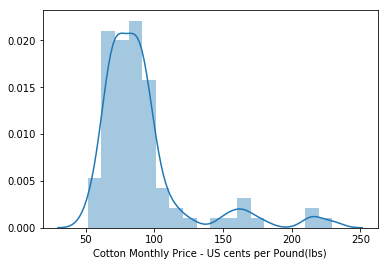

In [7]:
sns.distplot(economicData['Cotton Monthly Price - US cents per Pound(lbs)'])
plt.show()

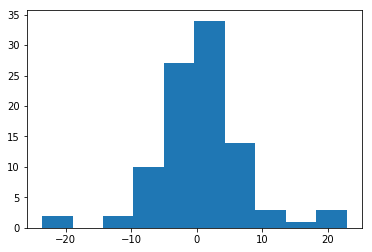

In [8]:
plt.hist(x = economicData['Change(in%)'])
plt.show()

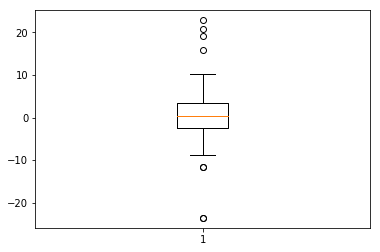

In [9]:
plt.boxplot(x = economicData['Change(in%)'])
plt.show()

In [18]:
economicData['Change(in%)'].quantile(0.1)

-6.199

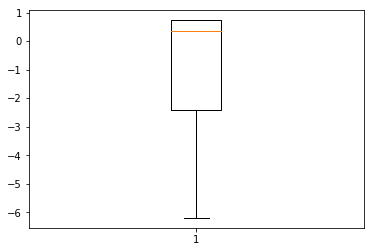

In [17]:
plt.boxplot(x = economicData['Change(in%)'])
plt.show()

### Fill Na's and Outliers

In [15]:
economicData['Cotton Monthly Price - US cents per Pound(lbs)'] = economicData['Cotton Monthly Price - US cents per Pound(lbs)'].where(economicData['Cotton Monthly Price - US cents per Pound(lbs)'] < 79.5, 79.5)         
economicData['Change(in%)'] = economicData['Change(in%)'].where(economicData['Change(in%)'] < 0.73, 0.73)     # 99th percentile
economicData['Change(in%)'] = economicData['Change(in%)'].where(economicData['Change(in%)'] > -6.199, -6.199) # 1 percentile

economicData['yieldperharvested acre'] = economicData['yieldperharvested acre'].where(economicData['yieldperharvested acre'] < 810, 810)
economicData['Mill use  (in  480-lb netweright in million bales)'] = economicData['Mill use  (in  480-lb netweright in million bales)'].where(economicData['Mill use  (in  480-lb netweright in million bales)'] < 3.275, 3.275)
economicData['Exports'] = economicData['Exports'].where(economicData['Exports'] < 11.6, 11.6)


In [30]:
# economicData['Change(in%)'] = economicData['Change(in%)'].where(economicData['Change(in%)'] < 0.73, 0.73)
# economicData['Change(in%)'] = economicData['Change(in%)'].where(economicData['Change(in%)'] > 0, 0)

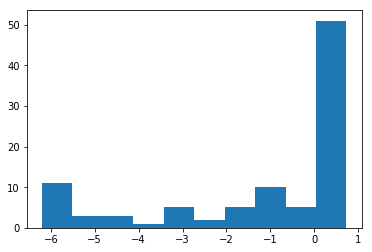

In [16]:
plt.hist(x = economicData['Change(in%)'])
plt.show()

In [19]:
economicData['AdvertisingExpenses (in Thousand Dollars)'] = economicData['AdvertisingExpenses (in Thousand Dollars)'].fillna(0)

In [20]:
economicData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 18 columns):
Monthly Nominal GDP Index (inMillion$)                               96 non-null float64
Monthly Real GDP Index (inMillion$)                                  96 non-null float64
CPI                                                                  96 non-null float64
unemployment rate                                                    96 non-null float64
CommercialBankInterestRateonCreditCardPlans                          96 non-null float64
Finance Rate on Personal Loans at Commercial Banks, 24 Month Loan    96 non-null float64
Earnings or wages  in dollars per hour                               96 non-null float64
AdvertisingExpenses (in Thousand Dollars)                            96 non-null float64
Cotton Monthly Price - US cents per Pound(lbs)                       96 non-null float64
Change(in%)                                                          96 non-null float64
Average

In [21]:
economicData.to_csv('C:\\Users\\HP\\Desktop\\PHD Hackathon\\Data Science\\PHD Models\\Weather_Features\\economic_features.csv', index=False)

### Holiday Features

In [35]:
holiday_data = pd.read_excel('C:\\Users\\HP\Desktop\\PHD Hackathon\\Data Science\\PhD_Train_Data\\Events_HolidaysData.xlsx')
holiday_data.tail()

,Year,MonthDate,Event,DayCategory
145,2016,2024-11-01,Thanksgiving Day,Federal Holiday
146,2016,2024-12-01,Christmas Eve,Event
147,2016,2025-12-01,Christmas Day,Federal Holiday
148,2016,2026-12-01,'Christmas Day' observed,Federal Holiday
149,2016,1931-12-01,New Year's Eve,Event


In [36]:
holiday_data.MonthDate = holiday_data.MonthDate.astype(str).str[2:7]

holiday_data['Month'] = holiday_data['MonthDate'].str[3:5]
holiday_data['Day'] = holiday_data['MonthDate'].str[0:2]

In [37]:
vals_to_replace1 = {'01':'1','02':'2','03':'3','04':'4','05':'5','06':'6','07':'7','08':'8','09':'9','10':'10','11':'11','12':'12'}
holiday_data['Month'] = holiday_data['Month'].apply(lambda x: vals_to_replace1[x])

In [38]:
holiday_data[['Year']] = holiday_data['Year'].astype('int64')
holiday_data[['Month']] = holiday_data['Month'].astype('int64')

In [39]:
holiday_pivot = pivot_table(holiday_data, values = ['Day'], index = ['Year', 'Month'], columns = ['DayCategory'], 
                            aggfunc=np.count_nonzero, fill_value=0)
holiday_pivot.head()

Day                
DayCategory Event Federal Holiday
Year Month                       
2009 1          0               2
     2          1               1
     4          1               0
     5          1               1
     6          1               0

In [40]:
holiday_pivot.columns = ['Event', 'Federal Holiday']
holiday_pivot = holiday_pivot.reset_index()
holiday_pivot.head()

,Year,Month,Event,Federal Holiday
0,2009,1,0,2
1,2009,2,1,1
2,2009,4,1,0
3,2009,5,1,1
4,2009,6,1,0


In [41]:
holiday_data = holidays.loc[0:129, ]
holiday_data.tail()

NameError: name 'holidays' is not defined

In [ ]:
holiday_pivot['Event_Yes_No'] = holiday_pivot['Event'].apply(lambda x: 'No' if x==0 else 'Yes')
holiday_pivot['Federal Holiday_Yes_No'] = holiday_pivot['Federal Holiday'].apply(lambda x: 'No' if x==0 else 'Yes')
# holiday_pivot = holiday_pivot.reset_index()
holiday_pivot.head()

In [ ]:
holiday_pivot.to_csv('C:\\Users\\HP\\Desktop\\PHD Hackathon\\Data Science\\PHD Models\\Weather_Features\\holidays_features.csv', index=False)

### Sales Features

In [42]:
trainDf = pd.read_csv('C:\\Users\\HP\Desktop\\PHD Hackathon\\Data Science\\PhD_Train_Data\\Train.csv', na_values=[' '])
trainDf.head()

,Year,Month,ProductCategory,Sales(In ThousandDollars)
0,2009,1,WomenClothing,1755.0
1,2009,1,MenClothing,524.0
2,2009,1,OtherClothing,936.0
3,2009,2,WomenClothing,1729.0
4,2009,2,MenClothing,496.0


In [43]:
trainDf['YearMonth'] = trainDf['Year'].map(str) + "-" + trainDf['Month'].map(str)
trainDf['YearMonth'] = pd.to_datetime(trainDf['YearMonth'], format='%Y-%m')
trainDf.head()

,Year,Month,ProductCategory,Sales(In ThousandDollars),YearMonth
0,2009,1,WomenClothing,1755.0,2009-01-01
1,2009,1,MenClothing,524.0,2009-01-01
2,2009,1,OtherClothing,936.0,2009-01-01
3,2009,2,WomenClothing,1729.0,2009-02-01
4,2009,2,MenClothing,496.0,2009-02-01


In [44]:
trainDf['Sales(In ThousandDollars)'] = trainDf.groupby('ProductCategory')['Sales(In ThousandDollars)'].apply(lambda x: x.fillna(x.mean()))
trainDf.isnull().any()

Year                         False
Month                        False
ProductCategory              False
Sales(In ThousandDollars)    False
YearMonth                    False
dtype: bool

In [45]:
train_pivoted = pivot_table(trainDf, index = ['Year', 'Month'], values = ['Sales(In ThousandDollars)'], columns = ['ProductCategory'])
train_pivoted.head()

Sales(In ThousandDollars)                            
ProductCategory               MenClothing OtherClothing WomenClothing
Year Month                                                           
2009 1                              524.0         936.0        1755.0
     2                              496.0         859.0        1729.0
     3                              542.0         921.0        2256.0
     4                              669.0         914.0        2662.0
     5                              650.0         989.0        2732.0

In [46]:
train_pivoted.columns = ['MenClothing_Sales', 'OtherClothing_Sales', 'WomenClothing_Sales']
train_pivoted = train_pivoted.reset_index()
train_pivoted.head()

,Year,Month,MenClothing_Sales,OtherClothing_Sales,WomenClothing_Sales
0,2009,1,524.0,936.0,1755.0
1,2009,2,496.0,859.0,1729.0
2,2009,3,542.0,921.0,2256.0
3,2009,4,669.0,914.0,2662.0
4,2009,5,650.0,989.0,2732.0


In [47]:
womenClothing_sales = train_pivoted.copy().drop(['MenClothing_Sales', 'OtherClothing_Sales'], axis = 1)
womenClothing_sales.head()

,Year,Month,WomenClothing_Sales
0,2009,1,1755.0
1,2009,2,1729.0
2,2009,3,2256.0
3,2009,4,2662.0
4,2009,5,2732.0


In [48]:
womenClothing_sales.to_csv('C:\\Users\\HP\\Desktop\\PHD Hackathon\\Data Science\\PHD Models\\Weather_Features\\womenClothing_sales.csv', index=False)

In [49]:
########################################################################################################################

In [50]:
csv_files = os.chdir('C:\\Users\\HP\\Desktop\\PHD Hackathon\\Data Science\\PHD Models\\Weather_Features')
weather_features = pd.read_csv('weatherData_full.csv', encoding='latin 1')
holidays_features = pd.read_csv('holidays_features.csv')
economic_features = pd.read_csv('economic_features.csv')
womenClothing_sales = pd.read_csv('womenClothing_sales.csv')

In [51]:
train_data.tail()

NameError: name 'train_data' is not defined

In [52]:
submisionData = pd.read_csv('C:\\Users\\HP\\Desktop\\PHD Hackathon\\Data Science\\PHD_Submissions\\regression_submission.csv')
submisionData

FileNotFoundError: File b'C:\\Users\\HP\\Desktop\\PHD Hackathon\\Data Science\\PHD_Submissions\\regression_submission.csv' does not exist

In [53]:
submisionData['YearMonth'] = submisionData['Year'].map(str) + "-" + submisionData['Month'].map(str)
submisionData['YearMonth'] = pd.to_datetime(submisionData['YearMonth'], format='%Y-%m')
submisionData.head()

NameError: name 'submisionData' is not defined

### Join 2016 records to woomen clothing

In [54]:
womenClothing_sales = pd.concat([womenClothing_sales, submisionData], axis=0)
train_data = womenClothing_sales.merge(holidays_features, left_on=['Year', 'Month'], right_on=['Year', 'Month'], how='left')
train_data = train_data.merge(economic_features, left_on=['Year', 'Month'], right_on=['Year', 'Month'], how='left')
train_data = train_data.merge(weather_features, left_on=['Year', 'Month'], right_on=['Year', 'Month'], how='left')

NameError: name 'submisionData' is not defined

In [55]:
train_data.tail()

NameError: name 'train_data' is not defined

In [56]:
sns.lineplot(x ='YearMonth', y='Sales(In ThousandDollars)', data = train_data)
plt.show()

NameError: name 'train_data' is not defined

In [57]:
cotton monthly price
change(in%)
yieldharvest
mill use
exports

SyntaxError: invalid syntax (<ipython-input-57-2dc2533bd6e4>, line 1)

In [58]:
0.99*len(economicData)

95.03999999999999

In [59]:
economicData_outliers = economicData.copy()

In [60]:
economicData_outliers['Exports'][95]

11.6

In [61]:
#economicData_outliers['Cotton Monthly Price - US cents per Pound(lbs)'] = economicData_outliers['Cotton Monthly Price - US cents per Pound(lbs)'].where(economicData_outliers['Cotton Monthly Price - US cents per Pound(lbs)'] < 79.5, 79.5)         
#economicData_outliers['Change(in%)'] = economicData_outliers['Change(in%)'].where(economicData_outliers['Change(in%)'] < 0.73, 0.73)
#economicData_outliers['yieldperharvested acre'] = economicData_outliers['yieldperharvested acre'].where(economicData_outliers['yieldperharvested acre'] < 810, 810)
#economicData_outliers['Mill use  (in  480-lb netweright in million bales)'] = economicData_outliers['Mill use  (in  480-lb netweright in million bales)'].where(economicData_outliers['Mill use  (in  480-lb netweright in million bales)'] < 3.275, 3.275)
#economicData_outliers['Exports'] = economicData_outliers['Exports'].where(economicData_outliers['Exports'] < 11.6, 11.6)


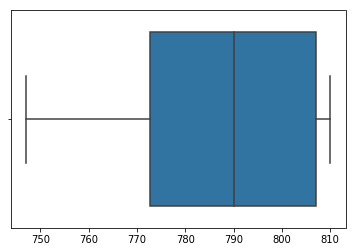

In [62]:
sns.boxplot(x=['yieldperharvested acre'], data=economicData_outliers)

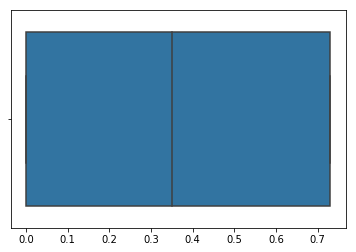

In [63]:
sns.boxplot(x=['Change(in%)'], data=economicData)

In [64]:
for i in economicData_outliers['Cotton Monthly Price - US cents per Pound(lbs)']:
    print(i)

57.7
55.21
51.5
56.78
61.95
61.39
64.8
64.26
64.07
66.82
71.78
76.78
77.4
79.5
79.5
79.5
79.5
79.5
79.5
79.5
79.5
79.5
79.5
79.5
79.5
79.5
79.5
79.5
79.5
79.5
79.5
79.5
79.5
79.5
79.5
79.5
79.5
79.5
79.5
79.5
79.5
79.5
79.5
79.5
79.5
79.5
79.5
79.5
79.5
79.5
79.5
79.5
79.5
79.5
79.5
79.5
79.5
79.5
79.5
79.5
79.5
79.5
79.5
79.5
79.5
79.5
79.5
74.0
73.38
70.34
67.53
68.3
67.35
69.84
69.35
71.7
72.86
72.35
72.35
71.82
68.74
69.03
69.22
70.39
68.75
66.57
65.46
69.28
70.28
74.1
79.5
79.5
77.86
78.52
78.92
79.5
